In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# histogram
A histogram is an approximate representation of the distribution of numerical data.

<IPython.core.display.Javascript object>


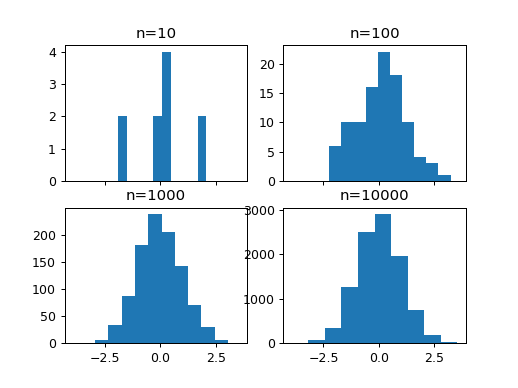

In [7]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]
for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

## np.random.normal():
This function creates a numpy array of random numbers with a normal (Gaussian) distribution.loc is mean scale is standard daviation, and size is size of array.

In [4]:
np.random.normal(loc=0.0,scale=1.0,size=10)

array([-0.42098642,  0.82487358,  1.25267733,  0.76154783,  0.08211164,
        1.18405155, -1.61184449, -0.99356548, -0.33376943,  0.29328048])

## mpl.axes.hist():
takes an array and bin is number of bars in histogram, it is 10 by default.
Lets try with 100 bins

<IPython.core.display.Javascript object>


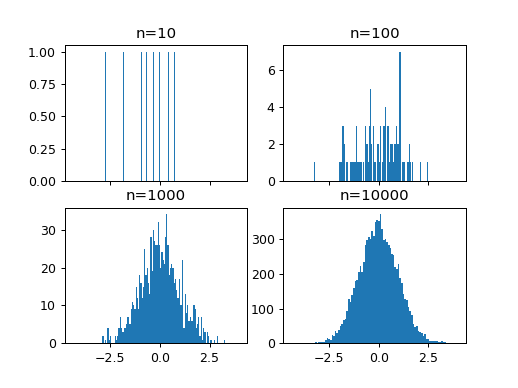

In [9]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]
for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    axs[n].hist(sample,bins=100)
    axs[n].set_title('n={}'.format(sample_size))

## number of bins you set should depends upon your data:
Too less or too many bins can disturb your data annalyzing too many bins start taking individual values and do not provide you accurate frequencies.

<IPython.core.display.Javascript object>


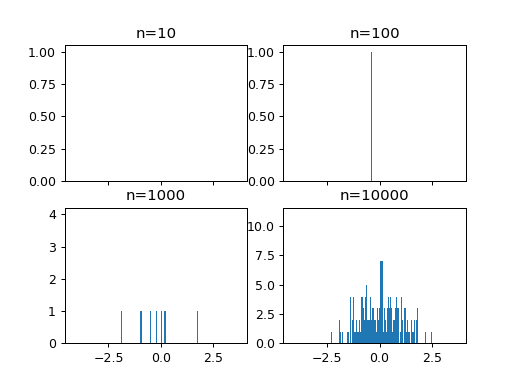

In [10]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]
for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    axs[n].hist(sample,bins=10000)
    axs[n].set_title('n={}'.format(sample_size))

## Example:
As you can see scatterplot alone sometimes does not give you accurate understanding of data. It shows just random data however there is an algorithm in case of Y

<IPython.core.display.Javascript object>


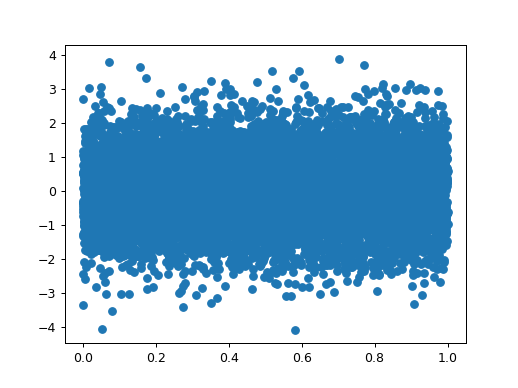

In [11]:
plt.figure()
Y=np.random.normal(loc=0.0,scale=1.0,size=10000)
X=np.random.random(size=10000)
plt.scatter(X,Y)

## gridspec:
gridspec divides your figure into grids so you can add subplots on diiferent positions and number of grids.
- 1st of all you need to import gridspec from matplotlib
- I created and grid of 3x3 (consider it 3 rows and 3 columns)We want to create:
    - A top histogram for X values in above example (We take two right grids in 1st row by slicing).
    - A side histogram for Y values in above ecample (We take two downward grids in 1st column by slicing)
    - A scatterplot (4 grids in right and below).

<IPython.core.display.Javascript object>


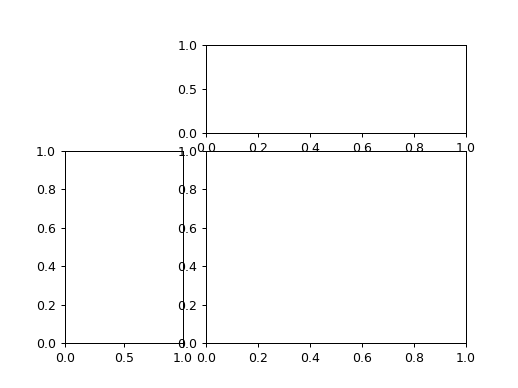

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

In [21]:
import matplotlib.gridspec as gridspec
def create_gridspec():
    plt.figure()
    gspec=gridspec.GridSpec(3,3)
    top_histogram=plt.subplot(gspec[0,1:])
    side_histogram=plt.subplot(gspec[1:,0])
    lower_right=plt.subplot(gspec[1:,1:])
    return top_histogram,side_histogram,lower_right
create_gridspec()

## Add data to the grids:

<IPython.core.display.Javascript object>


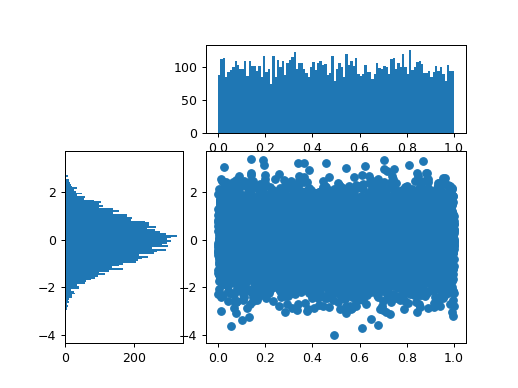

In [23]:
top_histogram,side_histogram,lower_right=create_gridspec()
def draw_grid():
    Y=np.random.normal(loc=0.0,scale=1.0,size=10000)
    X=np.random.random(size=10000)
    lower_right.scatter(X,Y)
    top_histogram.hist(X,bins=100)
    side_histogram.hist(Y,bins=100,orientation='horizontal')
draw_grid()

## density/normed= True and invert_xaxis:
density/normed=True changes Y values of the histogram to probability (0 to 1)

<IPython.core.display.Javascript object>


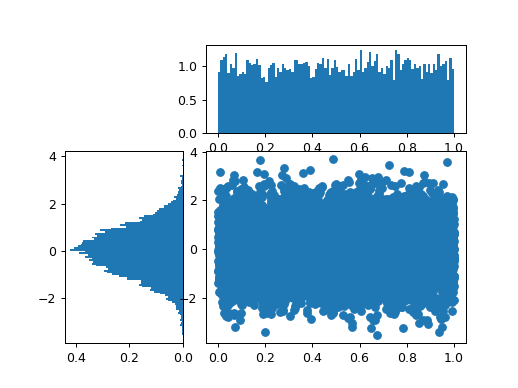

In [37]:
top_histogram,side_histogram,lower_right=create_gridspec()
draw_grid()
def cleaning():
    top_histogram.clear()
    top_histogram.hist(X, bins=100,density=True) # if density does not work used normed=True Instead
    side_histogram.clear()
    side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
    # flip the side histogram's x axis
    side_histogram.invert_xaxis()
cleaning()

## Setting labels,ticks and their position plus there limits to further clean:

<IPython.core.display.Javascript object>


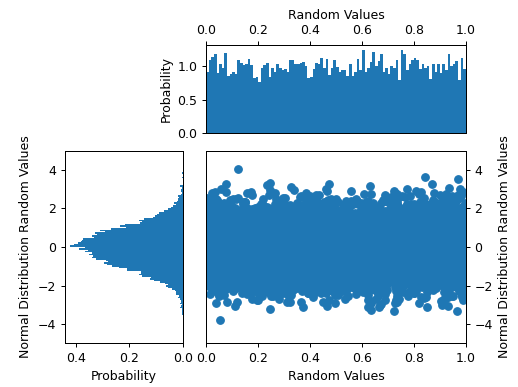

Text(0.5, 0, 'Probability')

In [54]:
top_histogram,side_histogram,lower_right=create_gridspec()
draw_grid()
cleaning()
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)
lower_right.set_xlabel("Random Values")
lower_right.set_ylabel("Normal Distribution Random Values")
lower_right.yaxis.set_ticks_position('right')
lower_right.yaxis.set_label_position('right')
top_histogram.xaxis.set_ticks_position('top')
top_histogram.set_xlabel("Random Values")
top_histogram.set_ylabel("Probability")
top_histogram.xaxis.set_label_position('top')
side_histogram.set_ylabel("Normal Distribution Random Values")
side_histogram.set_xlabel("Probability")
# side_histogram